In [96]:
!pip install yfinance

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [97]:
!pip install pandas-datareader==0.10.0

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [98]:
import numpy as np
import pandas as pd
import pandas_datareader as pdr
import yfinance as yf
import matplotlib
import matplotlib.pyplot as plt

ALFAA = pdr.get_data_yahoo('ALFAA.MX', start="01/01/2017", interval="m")
IPC = pdr.get_data_yahoo('^MXX', start="01/01/2017", interval="m")

In [99]:
ALFAA = ALFAA.loc[ALFAA["Adj Close"].notna()]
IPC = IPC.loc[IPC["Adj Close"].notna()]


In [100]:
ALFAA.tail()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2022-05-01,15.30,12.81,13.66,15.12,278403554.0,15.12
2022-06-01,15.21,13.16,15.11,14.28,188220874.0,14.28
2022-07-01,15.37,13.51,14.25,14.01,109145600.0,14.01
2022-08-01,14.35,13.63,13.98,14.29,69329711.0,14.29
2022-08-18,14.30,14.07,14.20,14.25,1411005.0,14.25


In [101]:
IPC

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2017-01-01,48632.511719,45314.578125,45642.800781,47001.058594,3957117700,47001.058594
2017-02-01,48115.980469,46587.929688,47001.968750,46856.789062,3659561100,46856.789062
2017-03-01,49523.941406,46597.578125,46853.671875,48541.558594,4039192700,48541.558594
2017-04-01,50147.039062,48335.980469,48549.230469,49261.328125,2720546000,49261.328125
2017-05-01,50154.328125,48146.000000,49260.121094,48788.441406,3589382700,48788.441406
...,...,...,...,...,...,...
2022-05-01,52745.980469,48669.210938,51426.269531,51752.531250,5499191700,51752.531250
2022-06-01,51820.679688,46344.941406,51739.871094,47524.449219,4153468300,47524.449219
2022-07-01,48584.140625,46164.269531,47543.351562,48144.328125,2759226700,48144.328125


In [102]:
#x = ALFAA["Adj Close"]
#y = IPC["Adj Close"]
y = ALFAA["Adj Close"]
x = IPC["Adj Close"]

In [103]:
from sklearn.linear_model import LinearRegression

In [104]:
model = LinearRegression(fit_intercept=True)
model

LinearRegression()

In [105]:
X = x[:, np.newaxis]
X.shape

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  """Entry point for launching an IPython kernel.


(69, 1)

In [106]:
model.fit(X, y)

LinearRegression()

In [107]:
model.coef_ # This is the parameter value

array([0.00033705])

In [108]:
model.intercept_ # This is the bias value

2.3568855039761303

In [109]:
xfit = np.linspace(-1, 75000)
xfit

array([-1.00000000e+00,  1.52963265e+03,  3.06026531e+03,  4.59089796e+03,
        6.12153061e+03,  7.65216327e+03,  9.18279592e+03,  1.07134286e+04,
        1.22440612e+04,  1.37746939e+04,  1.53053265e+04,  1.68359592e+04,
        1.83665918e+04,  1.98972245e+04,  2.14278571e+04,  2.29584898e+04,
        2.44891224e+04,  2.60197551e+04,  2.75503878e+04,  2.90810204e+04,
        3.06116531e+04,  3.21422857e+04,  3.36729184e+04,  3.52035510e+04,
        3.67341837e+04,  3.82648163e+04,  3.97954490e+04,  4.13260816e+04,
        4.28567143e+04,  4.43873469e+04,  4.59179796e+04,  4.74486122e+04,
        4.89792449e+04,  5.05098776e+04,  5.20405102e+04,  5.35711429e+04,
        5.51017755e+04,  5.66324082e+04,  5.81630408e+04,  5.96936735e+04,
        6.12243061e+04,  6.27549388e+04,  6.42855714e+04,  6.58162041e+04,
        6.73468367e+04,  6.88774694e+04,  7.04081020e+04,  7.19387347e+04,
        7.34693673e+04,  7.50000000e+04])

In [110]:
Xfit = xfit[:, np.newaxis]
yfit = model.predict(Xfit)
yfit

array([ 2.35654846,  2.87244631,  3.38834417,  3.90424202,  4.42013988,
        4.93603773,  5.45193559,  5.96783344,  6.4837313 ,  6.99962916,
        7.51552701,  8.03142487,  8.54732272,  9.06322058,  9.57911843,
       10.09501629, 10.61091414, 11.126812  , 11.64270986, 12.15860771,
       12.67450557, 13.19040342, 13.70630128, 14.22219913, 14.73809699,
       15.25399485, 15.7698927 , 16.28579056, 16.80168841, 17.31758627,
       17.83348412, 18.34938198, 18.86527983, 19.38117769, 19.89707555,
       20.4129734 , 20.92887126, 21.44476911, 21.96066697, 22.47656482,
       22.99246268, 23.50836053, 24.02425839, 24.54015625, 25.0560541 ,
       25.57195196, 26.08784981, 26.60374767, 27.11964552, 27.63554338])

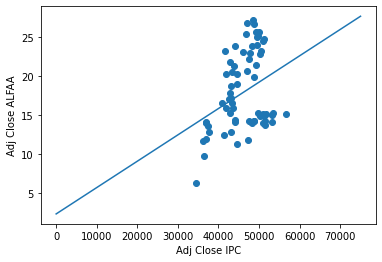

In [111]:
plt.scatter(x, y)
plt.xlabel("Adj Close IPC")
plt.ylabel("Adj Close ALFAA")
plt.plot(xfit, yfit);
plt.show()

FUNCION
y = 0.00033705x + 2.3568867207643507

In [164]:
import sklearn.metrics
y = np.array(y)

In [167]:
y[:59]

array([26.76594543, 25.41083336, 27.10224915, 25.62107277, 26.6609726 ,
       25.57155228, 24.44252396, 24.78915787, 22.76878166, 19.83726883,
       20.57014656, 21.41196823, 23.1352253 , 22.17456055, 23.09901237,
       23.81310654, 20.31205177, 22.91057014, 25.15203476, 24.92391968,
       23.93212318, 21.23442841, 20.29221725, 23.18827438, 23.87261391,
       21.77000237, 20.46082306, 19.02134895, 17.76053429, 18.72351837,
       16.47987175, 16.99610901, 17.20458984, 16.57866096, 15.26668072,
       15.90279198, 14.10378933, 12.49363136,  6.36111736,  9.81540775,
       11.68690586, 12.89143467, 11.98554993, 14.00636864, 13.6479969 ,
       14.10591698, 15.83804798, 14.31496716, 12.84621906, 11.34251499,
       11.7508049 , 14.11092472, 13.94535255, 14.922925  , 15.12242889,
       14.0650568 , 14.27453613, 14.87304878, 15.29200745])

In [169]:
sklearn.metrics.mean_squared_error(y[:50], yfit)

168.59838056529222

SE PUEDE OBSERVAR QUE HAY UNA RELACION CRECIENTE, PERO NO MU SIGNIFICATIVA, DEBIDO A QUE SE OBSERVA QUE LA MAYORIA DE LOS PUNTOS ESTAN ALEJADOS DE LA LINEA DE REGRESIÓN. DE IGUAL MANERA SE PUEDE VER QUE NO HAY UNA GRAN ACERTIVIDAD EN LA REGRESIÓN POR EL MSE QUE ES DE 168

In [112]:
ALFAA_r = np.log(ALFAA['Adj Close']) - np.log(ALFAA['Adj Close'].shift(1))
IPC_r = np.log(IPC['Adj Close']) - np.log(IPC['Adj Close'].shift(1))

In [133]:
xr =  ALFAA_r.loc[ALFAA_r.notna()]
yr = IPC_r.loc[IPC_r.notna()]

In [134]:
modelr = LinearRegression(fit_intercept=True)
modelr

LinearRegression()

In [135]:
Xr = xr[:, np.newaxis]
Xr.shape

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  """Entry point for launching an IPython kernel.


(68, 1)

In [136]:
Xr

array([[-5.19547935e-02],
       [ 6.44411255e-02],
       [-5.62015508e-02],
       [ 3.97856276e-02],
       [-4.17203011e-02],
       [-4.51560939e-02],
       [ 1.40819743e-02],
       [-8.50160025e-02],
       [-1.37827940e-01],
       [ 3.62783960e-02],
       [ 4.01092002e-02],
       [ 7.74063318e-02],
       [-4.24106501e-02],
       [ 4.08441518e-02],
       [ 3.04462616e-02],
       [-1.59021731e-01],
       [ 1.20383989e-01],
       [ 9.33404158e-02],
       [-9.11082624e-03],
       [-4.06063492e-02],
       [-1.19597777e-01],
       [-4.53864198e-02],
       [ 1.33409310e-01],
       [ 2.90852039e-02],
       [-9.21989564e-02],
       [-6.20209965e-02],
       [-7.29500099e-02],
       [-6.85831567e-02],
       [ 5.28015798e-02],
       [-1.27640658e-01],
       [ 3.08446937e-02],
       [ 1.21917636e-02],
       [-3.70598152e-02],
       [-8.24436616e-02],
       [ 4.08219670e-02],
       [-1.20051182e-01],
       [-1.21224485e-01],
       [-6.75014976e-01],
       [ 4.3

In [137]:
modelr.fit(Xr, yr)

LinearRegression()

In [138]:
modelr.coef_ # This is the parameter value

array([0.22592584])

In [139]:
modelr.intercept_ # This is the bias value

0.002625563278741477

In [140]:
xrfit = np.linspace(-1, 10)
xrfit

array([-1.        , -0.7755102 , -0.55102041, -0.32653061, -0.10204082,
        0.12244898,  0.34693878,  0.57142857,  0.79591837,  1.02040816,
        1.24489796,  1.46938776,  1.69387755,  1.91836735,  2.14285714,
        2.36734694,  2.59183673,  2.81632653,  3.04081633,  3.26530612,
        3.48979592,  3.71428571,  3.93877551,  4.16326531,  4.3877551 ,
        4.6122449 ,  4.83673469,  5.06122449,  5.28571429,  5.51020408,
        5.73469388,  5.95918367,  6.18367347,  6.40816327,  6.63265306,
        6.85714286,  7.08163265,  7.30612245,  7.53061224,  7.75510204,
        7.97959184,  8.20408163,  8.42857143,  8.65306122,  8.87755102,
        9.10204082,  9.32653061,  9.55102041,  9.7755102 , 10.        ])

In [141]:
Xrfit = xrfit[:, np.newaxis]
yrfit = model.predict(Xrfit)
yrfit

array([2.35654846, 2.35662412, 2.35669978, 2.35677545, 2.35685111,
       2.35692678, 2.35700244, 2.3570781 , 2.35715377, 2.35722943,
       2.3573051 , 2.35738076, 2.35745642, 2.35753209, 2.35760775,
       2.35768342, 2.35775908, 2.35783474, 2.35791041, 2.35798607,
       2.35806174, 2.3581374 , 2.35821306, 2.35828873, 2.35836439,
       2.35844006, 2.35851572, 2.35859138, 2.35866705, 2.35874271,
       2.35881838, 2.35889404, 2.3589697 , 2.35904537, 2.35912103,
       2.3591967 , 2.35927236, 2.35934802, 2.35942369, 2.35949935,
       2.35957502, 2.35965068, 2.35972634, 2.35980201, 2.35987767,
       2.35995334, 2.360029  , 2.36010466, 2.36018033, 2.36025599])

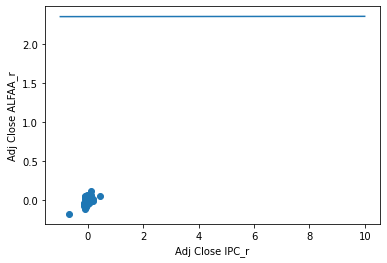

In [142]:
plt.scatter(xr, yr)
plt.xlabel("Adj Close IPC_r")
plt.ylabel("Adj Close ALFAA_r")
plt.plot(xrfit, yrfit);
plt.show()

In [122]:
!pip install researchpy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [123]:
import researchpy as rp
# Using the ttest function from researchpy:
rp.ttest(ALFAA_r,IPC_r,equal_variances=False)

(    Variable      N      Mean        SD        SE  95% Conf.  Interval
 0  Adj Close   68.0 -0.009270  0.125454  0.015214  -0.039637  0.021096
 1  Adj Close   68.0  0.000531  0.048396  0.005869  -0.011183  0.012246
 2   combined  136.0 -0.004370  0.094856  0.008134  -0.020456  0.011717,
                           Welch's t-test  results
 0  Difference (Adj Close - Adj Close) =   -0.0098
 1                  Degrees of freedom =   87.0916
 2                                   t =   -0.6011
 3               Two side test p value =    0.5494
 4              Difference < 0 p value =    0.2747
 5              Difference > 0 p value =    0.7253
 6                           Cohen's d =   -0.1031
 7                           Hedge's g =   -0.1025
 8                       Glass's delta =   -0.0781
 9                         Pearson's r =    0.0643)

TANTO T VALUE COMO EL P VALUE NOS DICE QUE LA ACERTIVIDAD ES MUY POCA